In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from analyzeActiveSurface import *

Zeros enabled: 1
FEM enabled: 1
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


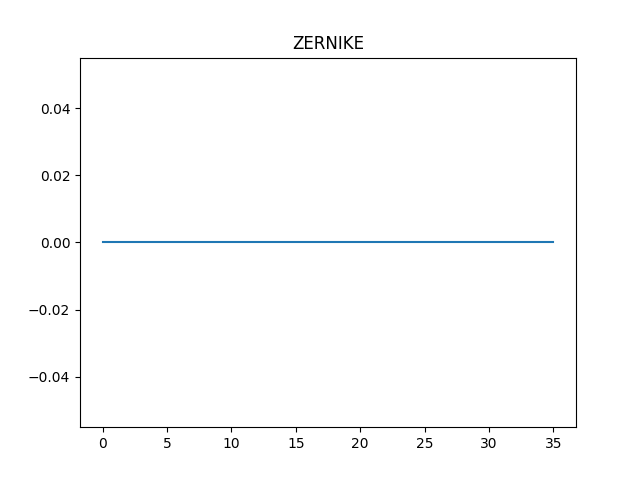

<IPython.core.display.Javascript object>


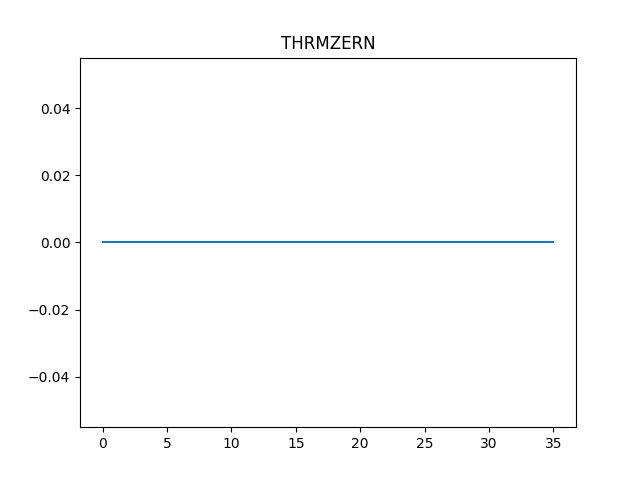

<IPython.core.display.Javascript object>


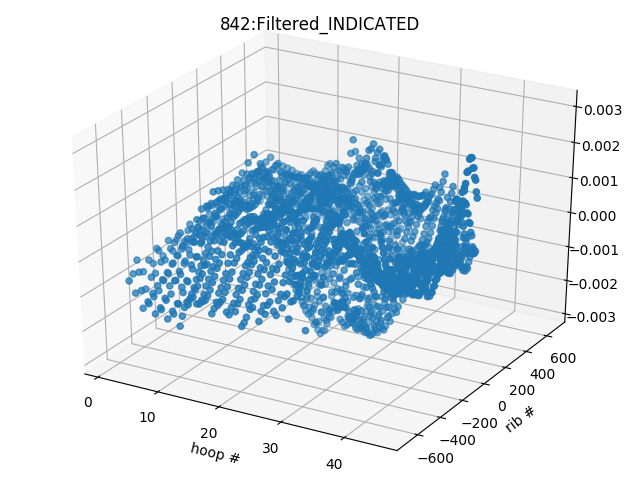

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


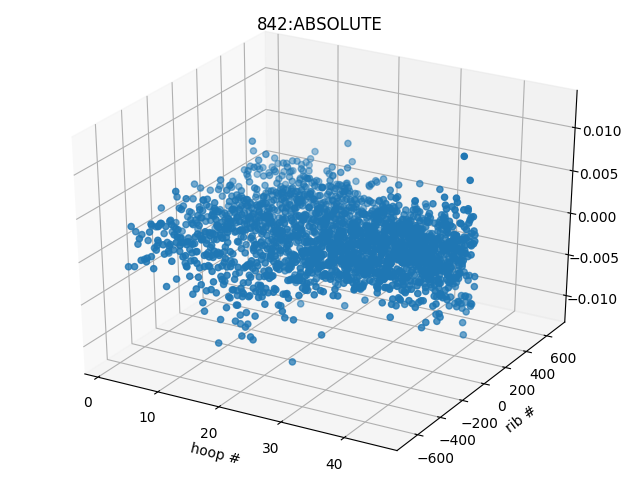

In [2]:
    fn = 'data/ActiveSurfaceMgr/2019_02_07_17:33:29.fits'
    plotFile(fn)

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


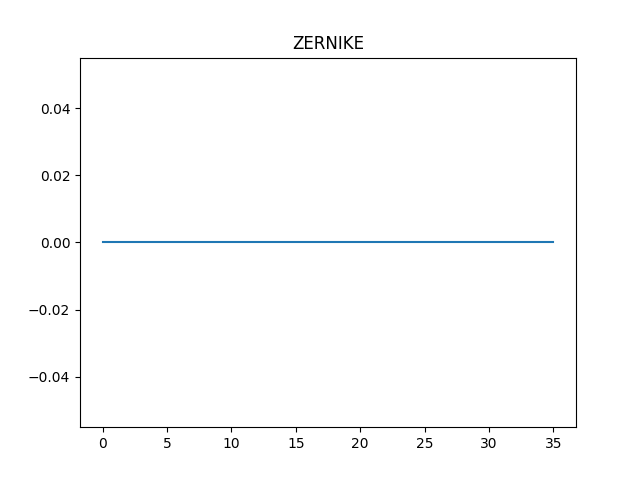

<IPython.core.display.Javascript object>


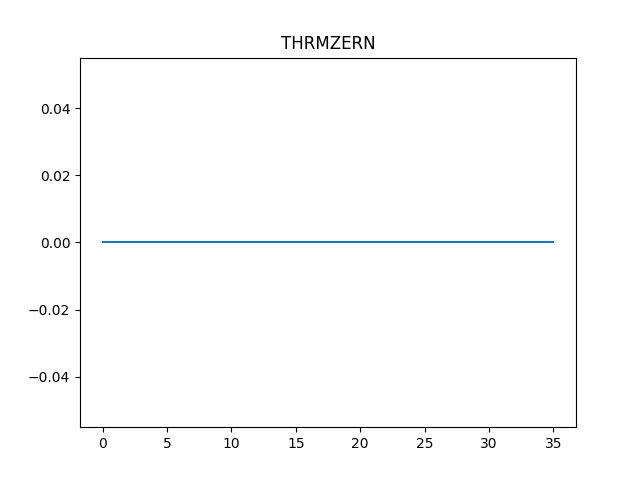

<IPython.core.display.Javascript object>


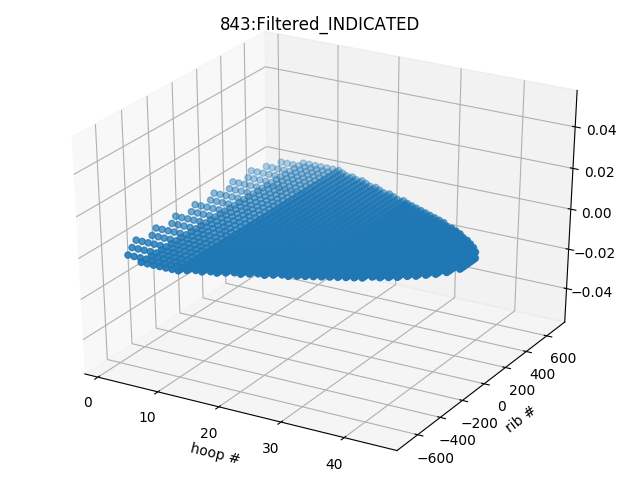

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


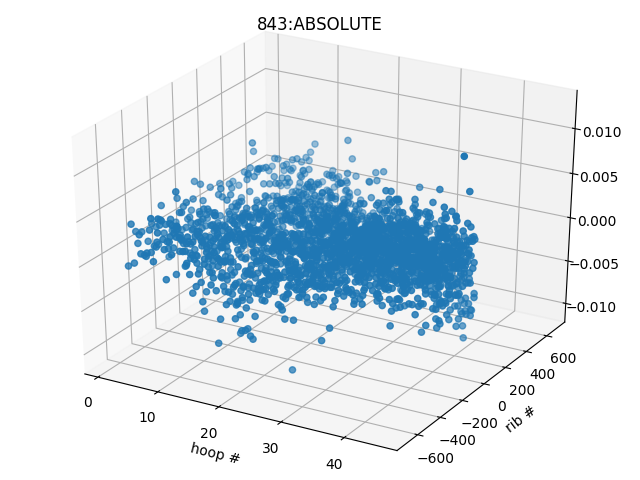

In [3]:
fn4 = "data/ActiveSurfaceMgr/2019_02_07_18:10:22.fits"
plotFile(fn4)

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


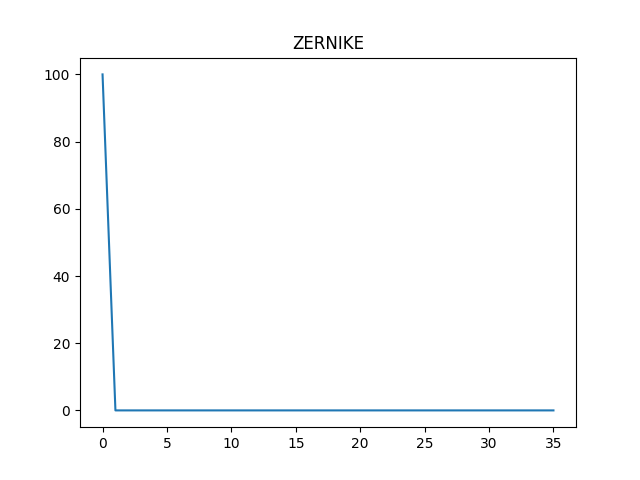

<IPython.core.display.Javascript object>


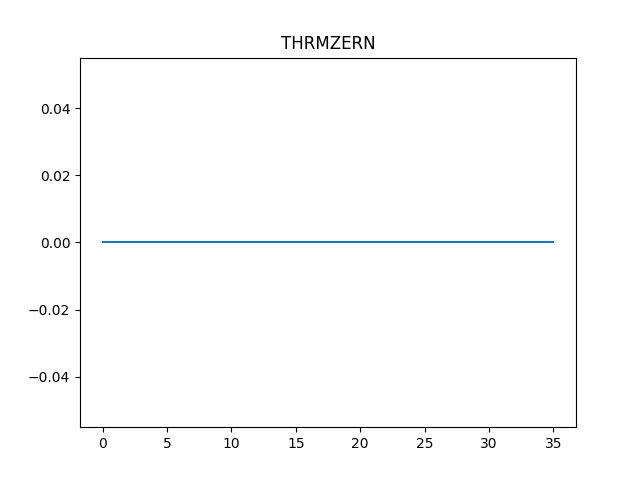

<IPython.core.display.Javascript object>


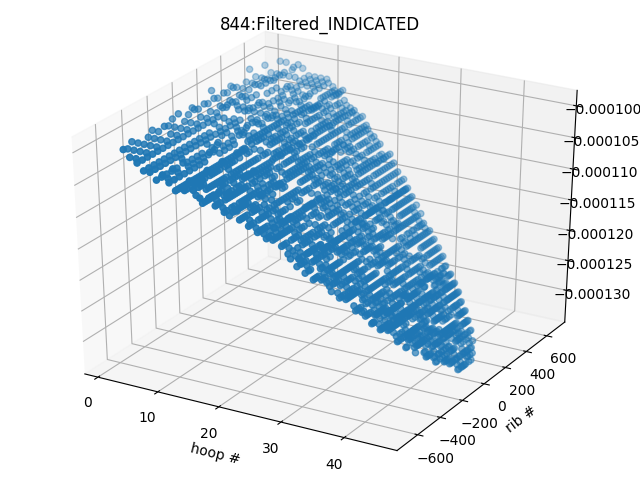

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


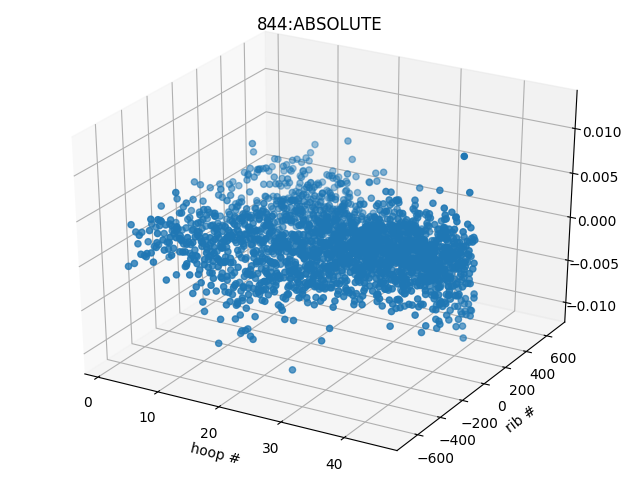

In [4]:
fn5 = "data/ActiveSurfaceMgr/2019_02_07_18:29:01.fits"
plotFile(fn5)

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


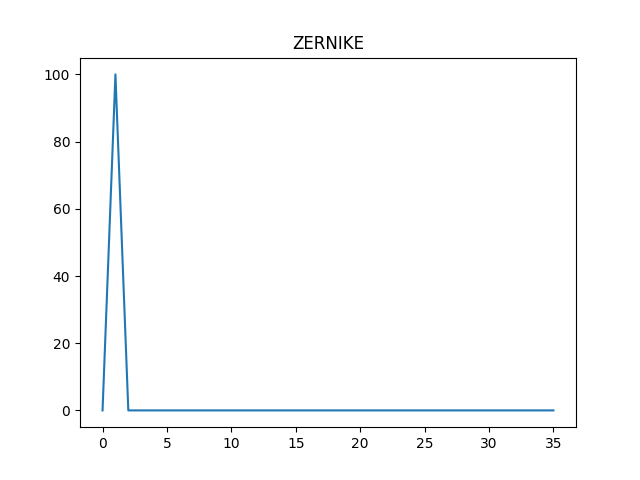

<IPython.core.display.Javascript object>


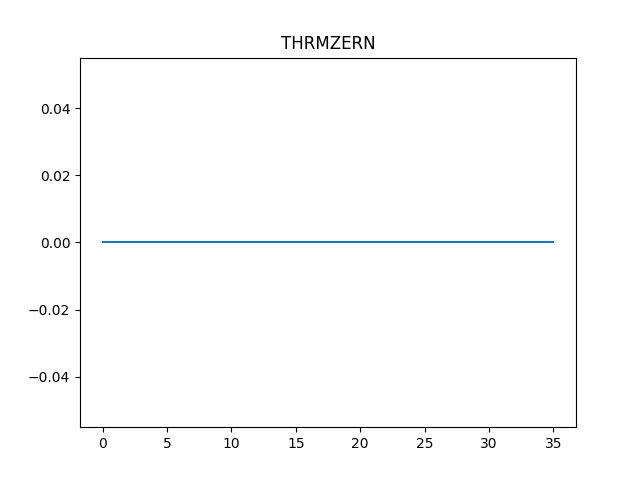

<IPython.core.display.Javascript object>


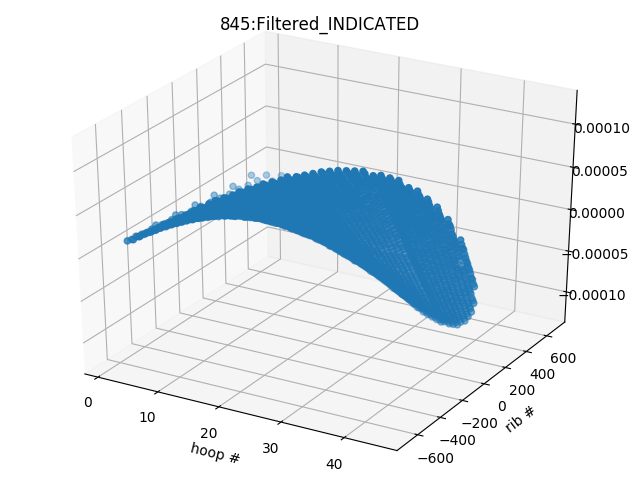

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


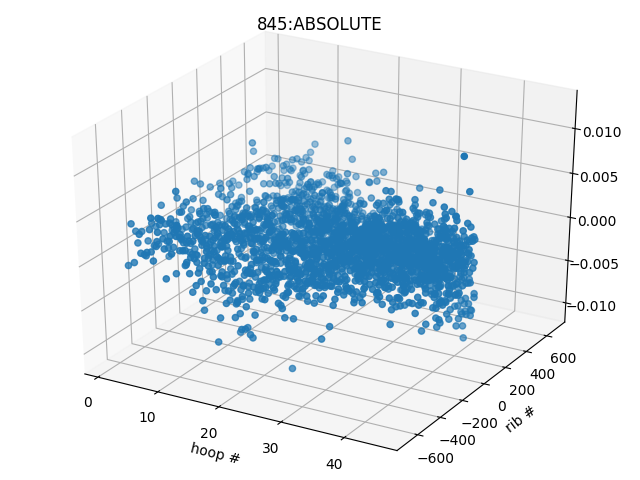

In [5]:
fn6 = "data/ActiveSurfaceMgr/2019_02_07_18:31:41.fits"
plotFile(fn6)

Zeros enabled: 1
FEM enabled: 0
Random enabled: 1
Zernikes enabled: 0
Thermal Zernikes enabled 0


<IPython.core.display.Javascript object>


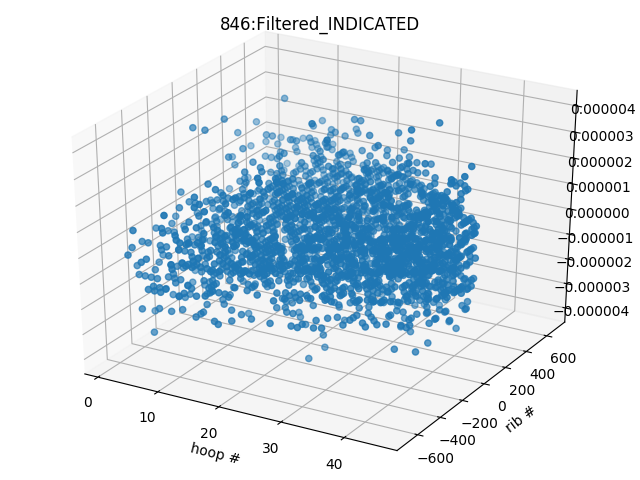

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


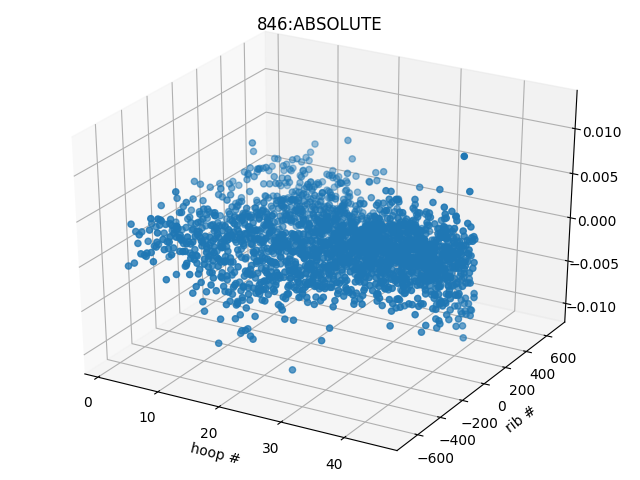

In [6]:
fn7 = "data/ActiveSurfaceMgr/2019_02_07_18:38:01.fits"
plotFile(fn7)

In [7]:
hs = fits.open(fn7)
data = hs['SURFACE']

In [8]:
inds = data.data.field('INDICATED')

In [9]:
inds

array([ 1.e-06,  0.e+00, -1.e-06, ..., -1.e-06,  1.e-06,  1.e-06])

In [10]:
len(inds)

2209

In [11]:
ninds = inds[inds > -1e-4]

In [12]:
len(ninds)

2208

In [13]:
len(inds)

2209

In [14]:
wh = np.where(inds < -1e-4)

In [15]:
import numpy as np

In [16]:
indsx = np.delete(inds, wh[0])

In [17]:
len(indsx)

2208

In [18]:
    femFn = 'data/ActiveSurfaceMgr/2019_02_07_17:33:29.fits'

In [19]:
noFemFn = "data/ActiveSurfaceMgr/2019_02_07_18:10:22.fits"

Zeros enabled: 1
FEM enabled: 1
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


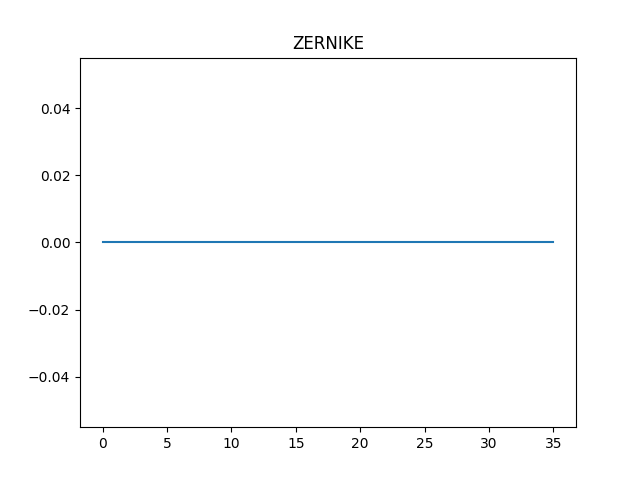

<IPython.core.display.Javascript object>


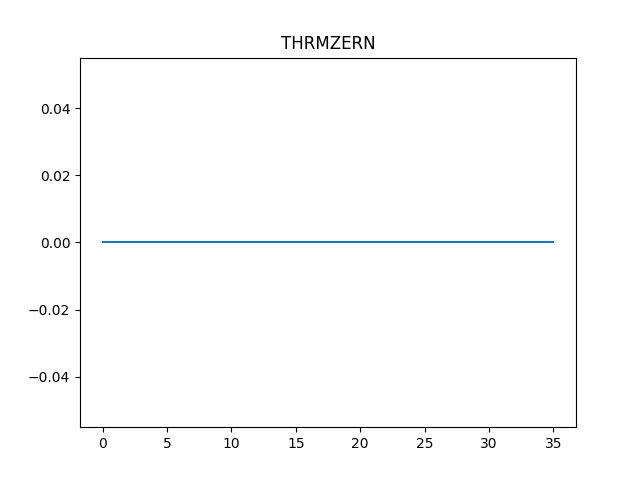

/data/sandboxes/pmargani/lassi-analysis/pmargani_lassi_env/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


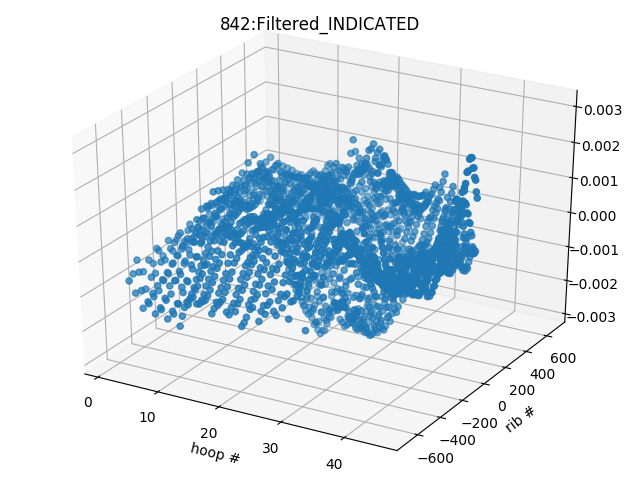

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


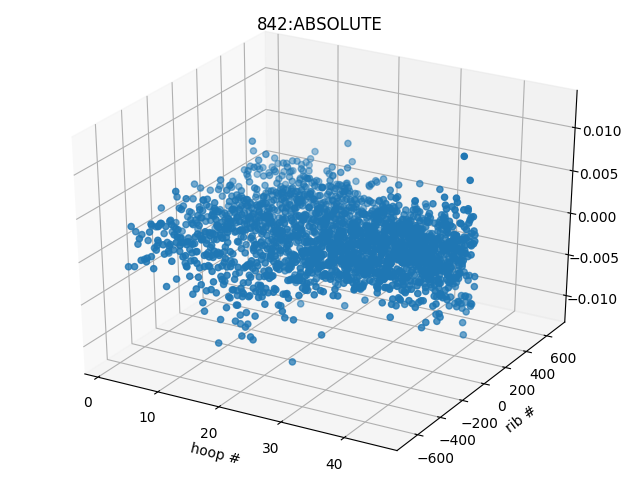

Zeros enabled: 1
FEM enabled: 0
Random enabled: 0
Zernikes enabled: 1
Thermal Zernikes enabled 1


<IPython.core.display.Javascript object>


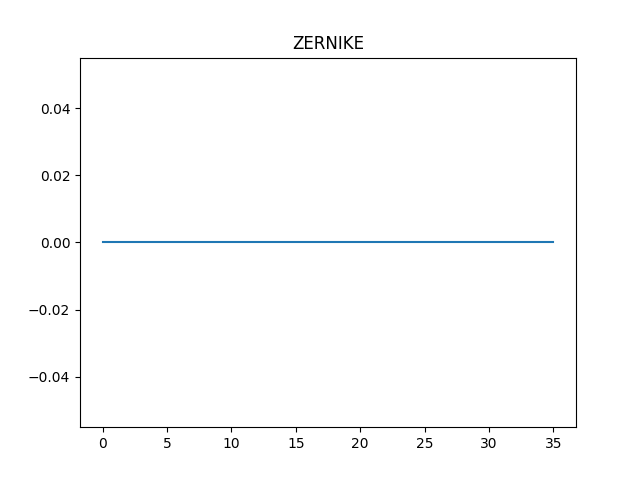

<IPython.core.display.Javascript object>


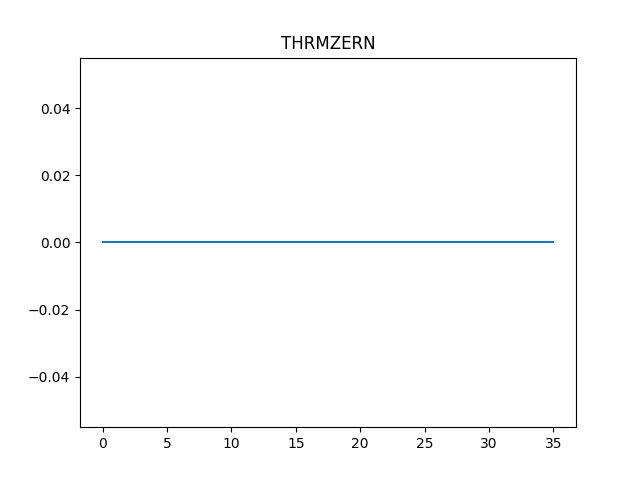

<IPython.core.display.Javascript object>


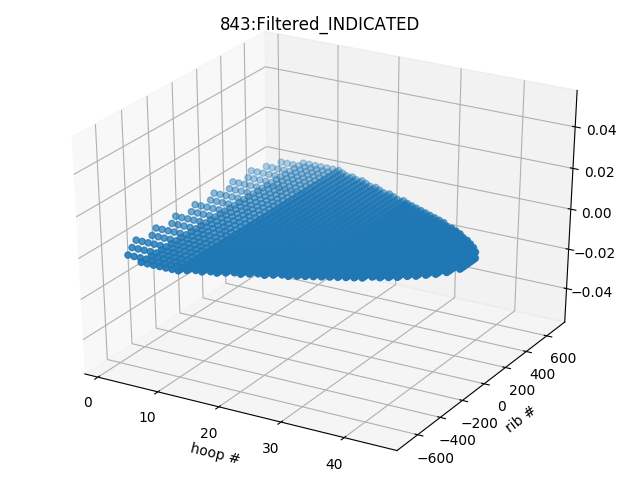

total indicated:  2209
filtered indicated:  2208


<IPython.core.display.Javascript object>


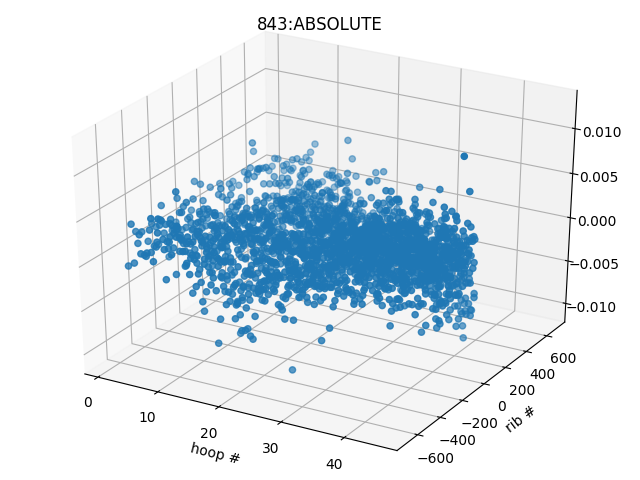

<type 'numpy.ndarray'> [ 0.001776  0.001966  0.00231  ... -0.000582 -0.000488 -0.000473]
ABSOLUTE Diff between scans: min=-0.002824, max=0.003021, mean=0.000001 


<IPython.core.display.Javascript object>


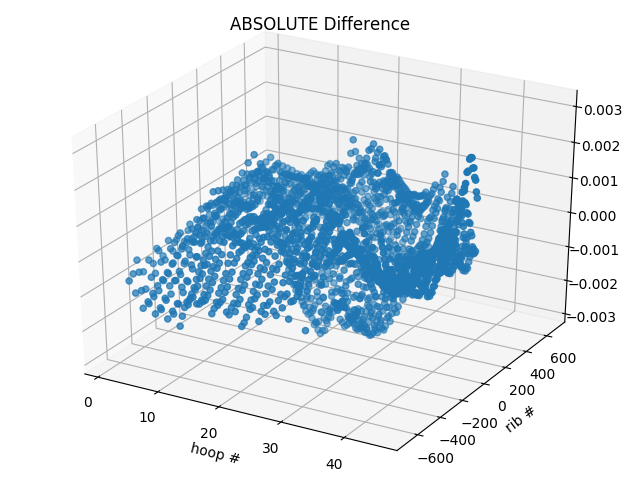

z:  [ 0.001776  0.001966  0.00231  ... -0.000582 -0.000488 -0.000473]


In [20]:
plotDiffs(femFn, noFemFn)

In [21]:
asfn = "data/ActiveSurfaceMgr/asdata.txt"
f = open(asfn, 'r')
ls = f.readlines()

In [22]:
len(ls)

2211

In [23]:
ls[:3]

['# Active surface commands at 20.682368\n',
 '# Zero points are On, FEM corrections are Off\n',
 '-12.741051 103.255394 -1780\n']

In [24]:
ls[-1]

'2.990607 2.630111 -8615\n'

In [25]:
ls = ls[2:]

In [26]:
len(ls)

2209

In [28]:
xs = []
ys = []
zs = []
for l in ls:
    ps = l.split(' ')
    xs.append(float(ps[0]))
    ys.append(float(ps[1]))
    zs.append(int(ps[2][:-1]))

<IPython.core.display.Javascript object>


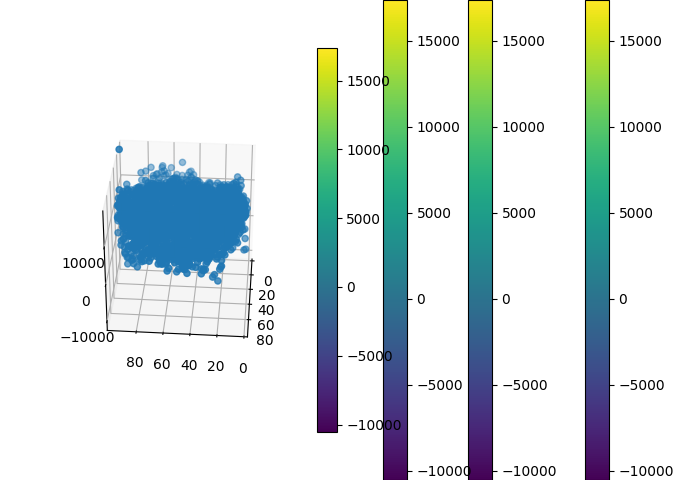

In [30]:
x = np.array(xs)
y = np.array(ys)
z = np.array(zs)
f = plt.figure()
ax = Axes3D(f)
ax.scatter(x, y, z)

In [41]:
from main import smoothSlow
xLoc, yLoc, zSmooth = smoothSlow(x, y, z, 100, sigEl=.1, sigAz=.1)

<IPython.core.display.Javascript object>


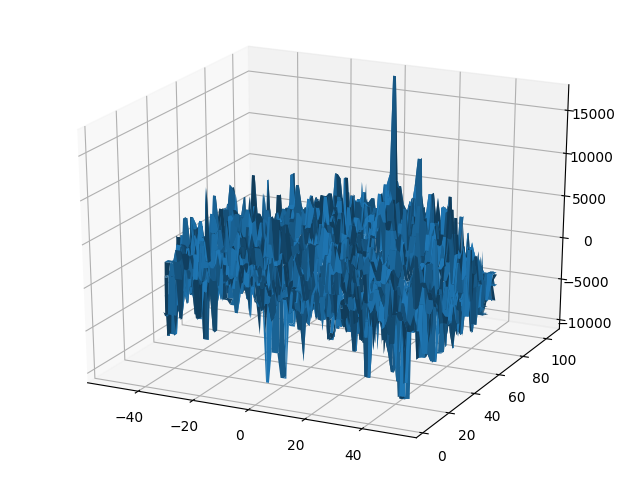

In [42]:
f = plt.figure()
ax = Axes3D(f)
ax.plot_surface(xLoc, yLoc, zSmooth)

<IPython.core.display.Javascript object>


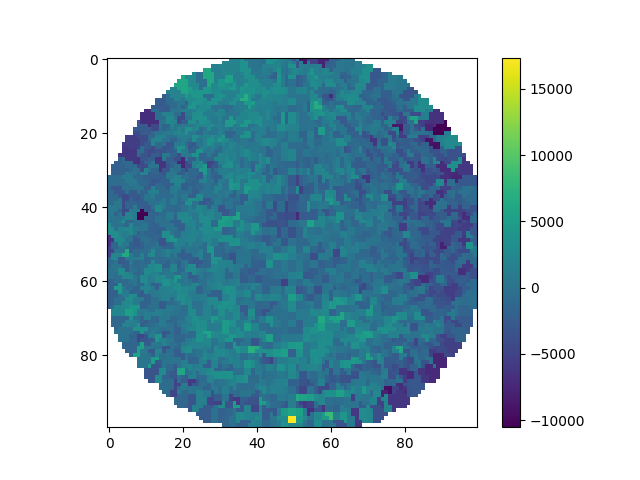

In [51]:
f = plt.figure()
ax = f.gca()
cax = ax.imshow(zSmooth)
# = plt.imshow(zSmooth)
#plt.colorbar()
#im.colorbar
#f = plt.figure()
#f.show()
cbar = f.colorbar(cax)
plt.show()

['# Active surface commands at 20.682368\n', '# Zero points are On, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


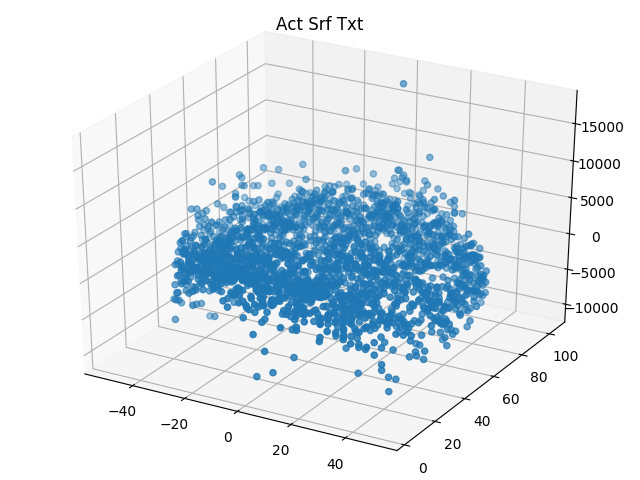

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


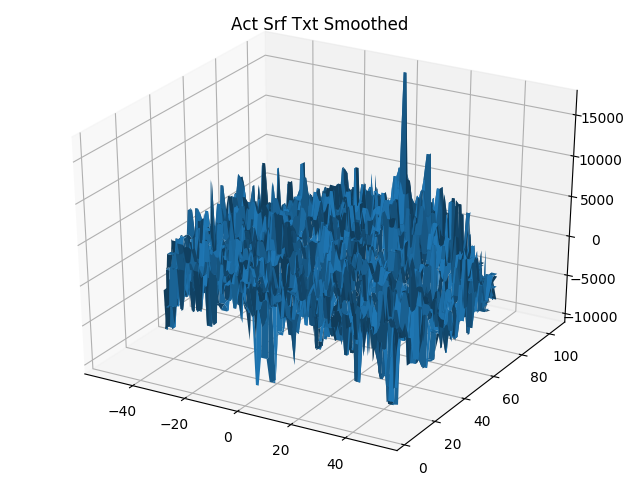

<IPython.core.display.Javascript object>


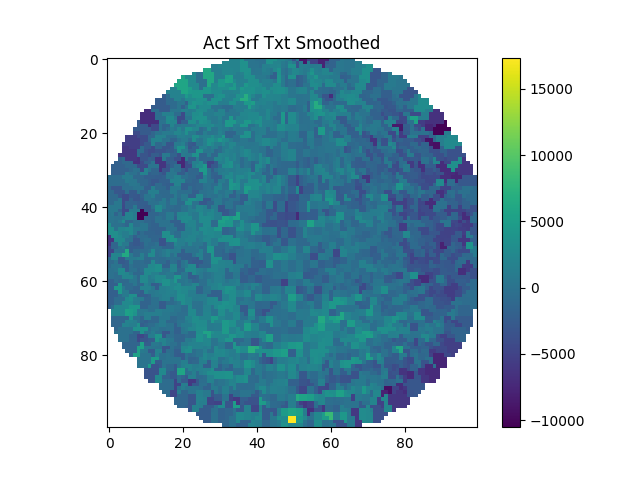

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from analyzeActiveSurface import *
asfn = "data/ActiveSurfaceMgr/asdata.txt"
plotActSrfTxt(asfn)

['# Active surface commands at 24.175521\n', '# Zero points are On, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


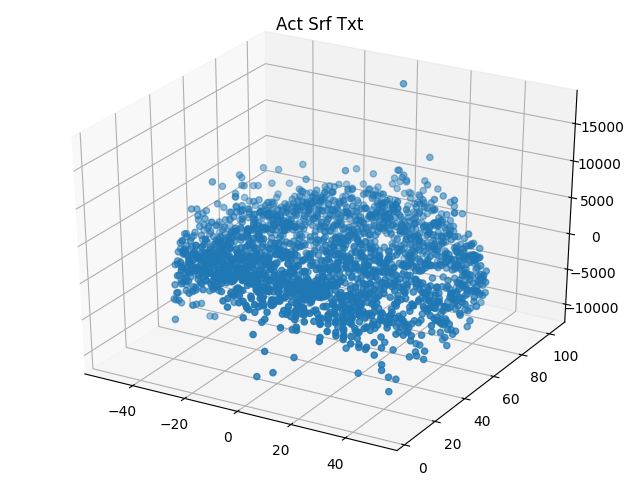

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


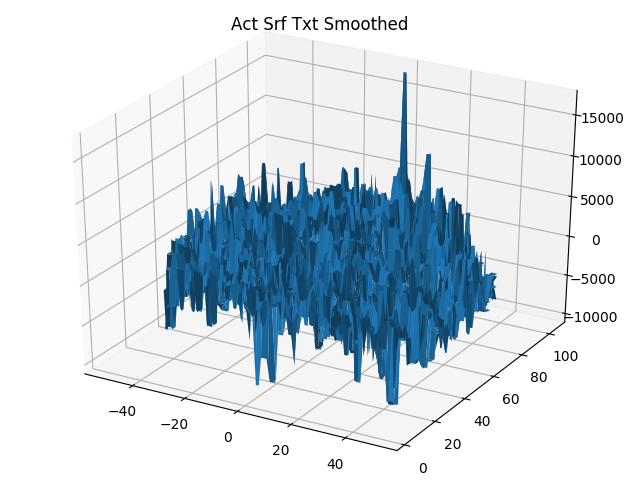

<IPython.core.display.Javascript object>


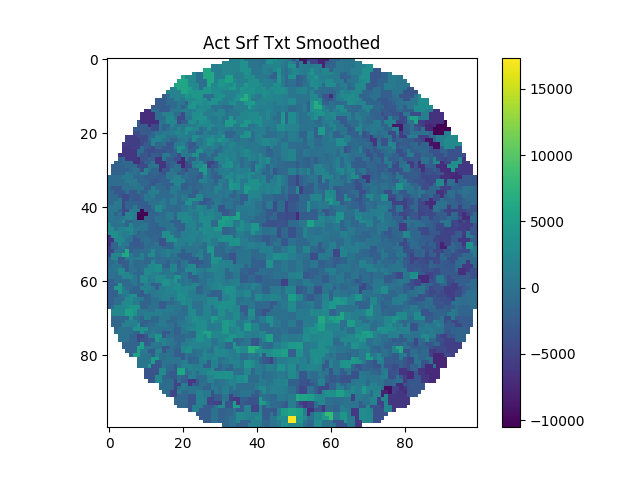

In [2]:
asfn = "data/ActiveSurfaceMgr/asdata.847.txt"
plotActSrfTxt(asfn)

['# Active surface commands at 23.960726\n', '# Zero points are Off, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


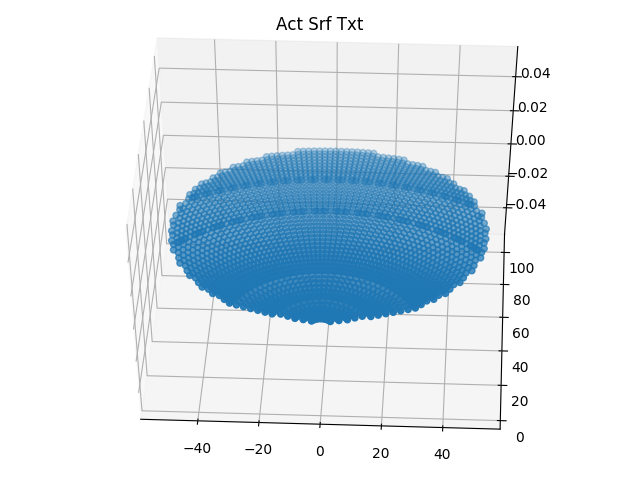

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


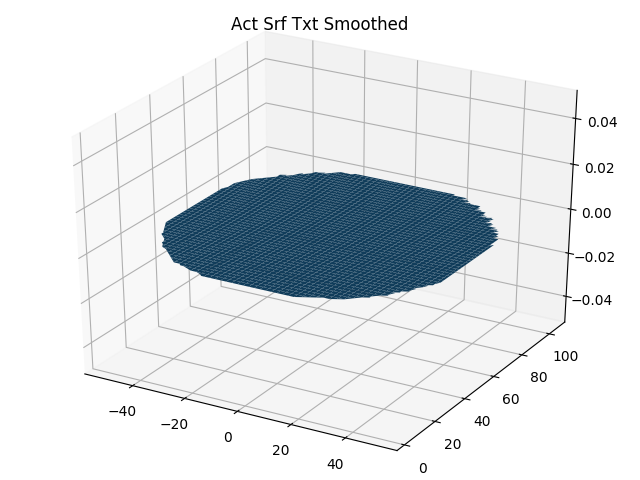

<IPython.core.display.Javascript object>


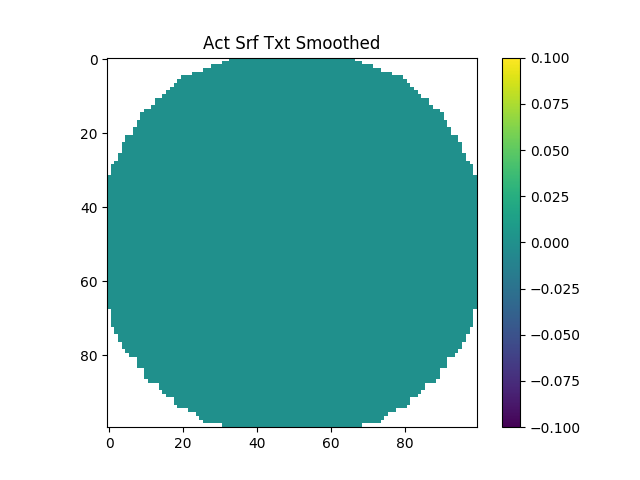

In [3]:
asfn = "data/ActiveSurfaceMgr/asdata.848.txt"
plotActSrfTxt(asfn)

['# Active surface commands at 23.846586\n', '# Zero points are Off, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


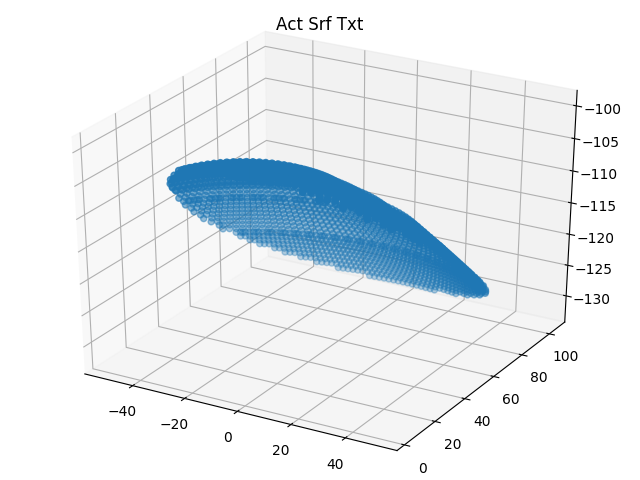

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


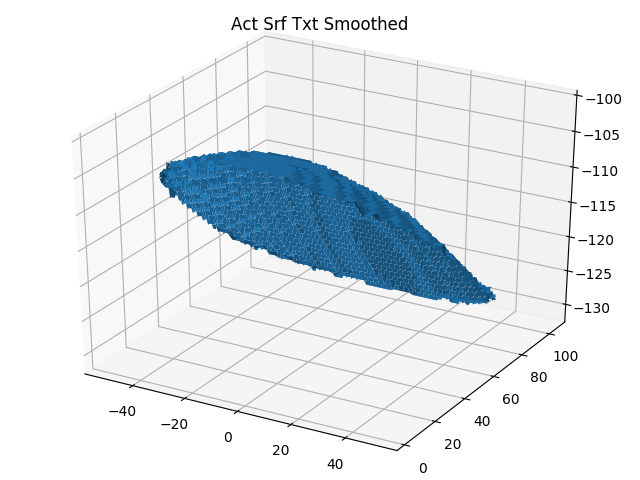

<IPython.core.display.Javascript object>


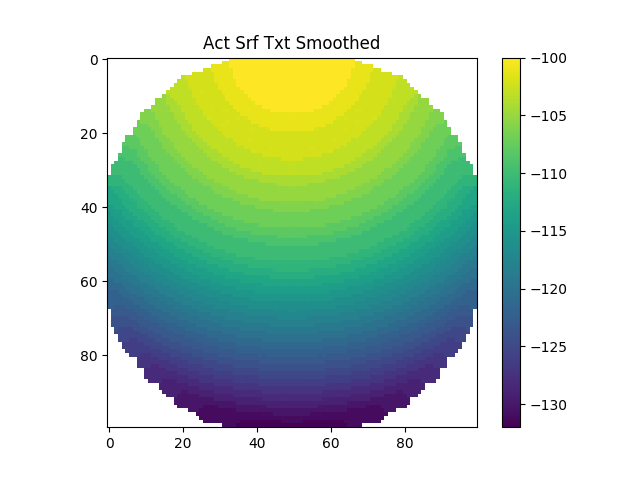

In [4]:
asfn = "data/ActiveSurfaceMgr/asdata.849.txt"
plotActSrfTxt(asfn)

['# Active surface commands at 23.748511\n', '# Zero points are Off, FEM corrections are Off\n']


<IPython.core.display.Javascript object>


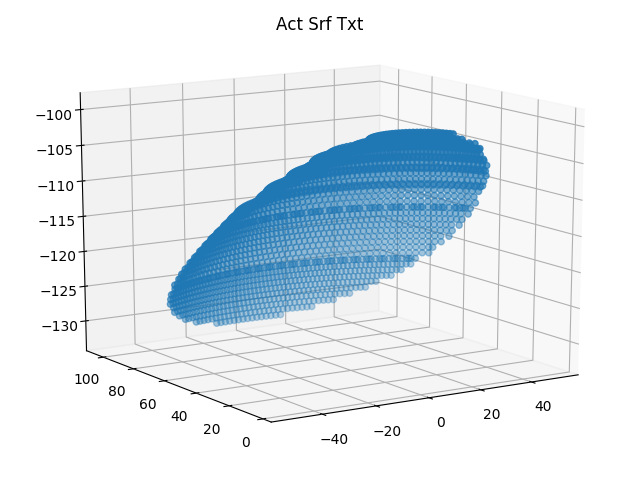

Smoothed data using 100 x 100 size grid, sigs: 0.100000, 0.100000


<IPython.core.display.Javascript object>


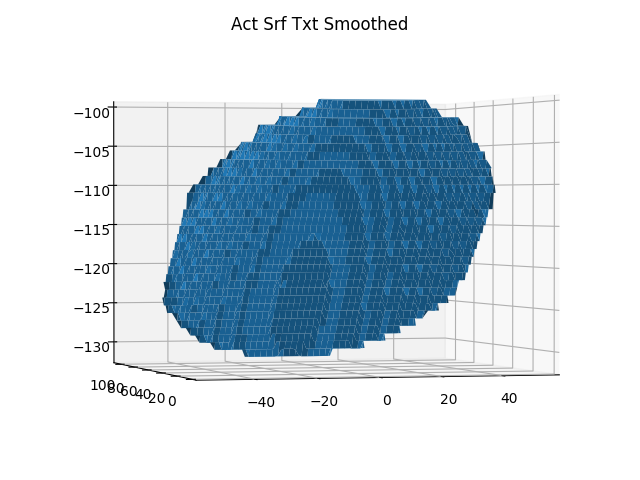

<IPython.core.display.Javascript object>


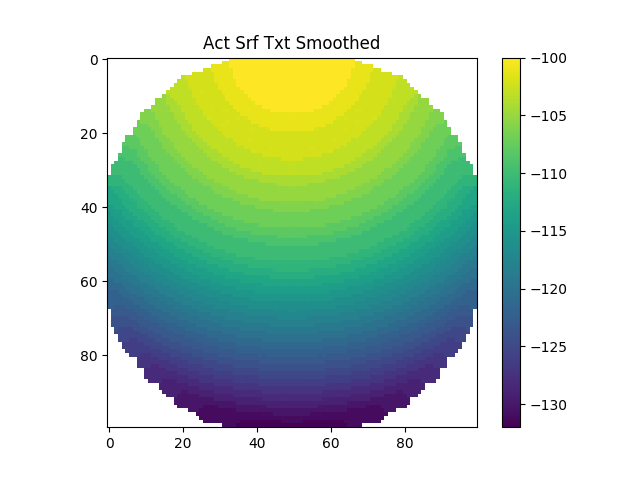

In [5]:
asfn = "data/ActiveSurfaceMgr/asdata.850.txt"
plotActSrfTxt(asfn)